# Rossmann store sales data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Frist look at the data

In [2]:
#data sets
datatrain = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')
datastore =pd.read_csv('store.csv')

C:\Users\abhin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
datatrain.shape

(1017209, 9)

In [4]:
datatest.shape

(41088, 8)

In [5]:
datastore.shape

(1115, 10)

## Train dataset

In [6]:
datatrain.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
datatrain.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
#Create new columns Year and Month to be used in the analysis of seasonal effects on sales.
datatrain['Year'] = pd.DatetimeIndex(datatrain['Date']).year
datatrain['Month'] = pd.DatetimeIndex(datatrain['Date']).month

In [9]:
import matplotlib.dates as mdates
import matplotlib.cm as cm
datatrain['Date'] = pd.to_datetime(datatrain['Date'], format='%Y-%m-%d')
datatest['Date'] = pd.to_datetime(datatest['Date'], format='%Y-%m-%d')

In [10]:
datatrain = datatrain[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open','Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
#list(datatrain.columns.values)

In [11]:
#Checking the NaN values
datatrain.isnull().any()

Store            False
DayOfWeek        False
Date             False
Year             False
Month            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
Sales            False
dtype: bool

In [12]:
# Checking the data types
datatrain.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
Sales                     int64
dtype: object

In [13]:
# Unique values of StateHoliday
datatrain['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [14]:
#convert data to numeric data
datatrain.loc[datatrain['StateHoliday'] == '0', 'StateHoliday'] = 0
datatrain.loc[datatrain['StateHoliday'] == 'a', 'StateHoliday'] = 1
datatrain.loc[datatrain['StateHoliday'] == 'b', 'StateHoliday'] = 1
datatrain.loc[datatrain['StateHoliday'] == 'c', 'StateHoliday'] = 1
datatrain['StateHoliday'] = datatrain['StateHoliday'].astype(int, copy=False)

In [15]:
datatrain.StateHoliday.unique()

array([0, 1], dtype=int64)

In [16]:
# Unique values of SchoolHoliday
datatrain['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [17]:
# Check the data types
datatrain.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int32
SchoolHoliday             int64
Sales                     int64
dtype: object

In [18]:
datatrain.describe()

,Store,DayOfWeek,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2.013832e+03,5.846762e+00,6.331459e+02,8.301067e-01,3.815145e-01,3.052470e-02,1.786467e-01,5.773819e+03
std,3.219087e+02,1.997391e+00,7.773960e-01,3.326097e+00,4.644117e+02,3.755392e-01,4.857586e-01,1.720261e-01,3.830564e-01,3.849926e+03
min,1.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2.013000e+03,3.000000e+00,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.727000e+03
50%,5.580000e+02,4.000000e+00,2.014000e+03,6.000000e+00,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.744000e+03
75%,8.380000e+02,6.000000e+00,2.014000e+03,8.000000e+00,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.856000e+03
max,1.115000e+03,7.000000e+00,2.015000e+03,1.200000e+01,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.155100e+04


## Test dataset

In [19]:
#Change Year and Month column 
datatest['Year'] = pd.DatetimeIndex(datatest['Date']).year
datatest['Month'] = pd.DatetimeIndex(datatest['Date']).month

In [20]:
datatest.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9
1,2,3,4,2015-09-17,1.0,1,0,0,2015,9
2,3,7,4,2015-09-17,1.0,1,0,0,2015,9
3,4,8,4,2015-09-17,1.0,1,0,0,2015,9
4,5,9,4,2015-09-17,1.0,1,0,0,2015,9


In [21]:
datatest.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
41083,41084,1111,6,2015-08-01,1.0,0,0,0,2015,8
41084,41085,1112,6,2015-08-01,1.0,0,0,0,2015,8
41085,41086,1113,6,2015-08-01,1.0,0,0,0,2015,8
41086,41087,1114,6,2015-08-01,1.0,0,0,0,2015,8
41087,41088,1115,6,2015-08-01,1.0,0,0,1,2015,8


In [22]:
# To check how many closed stores are there
sum(datatest['Open'] == 0)

5984

In [23]:
#Change the column order to make the test dataset and train dataset same 
datatest = datatest[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Open',
             'Promo', 'StateHoliday', 'SchoolHoliday']]
#list(datatest.columns.values)

In [24]:
#To check the NaN values in dataset
datatest.isnull().any()

Store            False
DayOfWeek        False
Date             False
Year             False
Month            False
Open              True
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [25]:
#To check the  missing values in Open column.
print(datatest.loc[np.isnan(datatest['Open'])])

       Store  DayOfWeek       Date  Year  Month  Open  Promo StateHoliday  \
479      622          4 2015-09-17  2015      9   NaN      1            0   
1335     622          3 2015-09-16  2015      9   NaN      1            0   
2191     622          2 2015-09-15  2015      9   NaN      1            0   
3047     622          1 2015-09-14  2015      9   NaN      1            0   
4759     622          6 2015-09-12  2015      9   NaN      0            0   
5615     622          5 2015-09-11  2015      9   NaN      0            0   
6471     622          4 2015-09-10  2015      9   NaN      0            0   
7327     622          3 2015-09-09  2015      9   NaN      0            0   
8183     622          2 2015-09-08  2015      9   NaN      0            0   
9039     622          1 2015-09-07  2015      9   NaN      0            0   
10751    622          6 2015-09-05  2015      9   NaN      0            0   

       SchoolHoliday  
479                0  
1335               0  
2191  

In [26]:
#converting missing values of Open column in to 1(Because all DayofWeek 1-6 )
datatest.loc[np.isnan(datatest['Open']), 'Open'] = 1

In [27]:
#Rechecking for NaN values
datatest.isnull().any()

Store            False
DayOfWeek        False
Date             False
Year             False
Month            False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [28]:
#Checking for data types
datatest.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [29]:
#Unique values of StateHoliday
datatest['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [30]:
#convert data to numeric data
datatest.loc[datatest['StateHoliday'] == '0', 'StateHoliday'] = 0
datatest.loc[datatest['StateHoliday'] == 'a', 'StateHoliday'] = 1
datatest['StateHoliday'] = datatest['StateHoliday'].astype(int, copy=False)

In [31]:
datatest['StateHoliday'].unique()

array([0, 1], dtype=int64)

In [32]:
datatest['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

In [33]:
datatest.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday              int32
SchoolHoliday             int64
dtype: object

In [34]:
datatest.describe()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday
count,41088.000000,41088.000000,41088.0,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,555.899533,3.979167,2015.0,8.354167,0.854361,0.395833,0.004381,0.443487
std,320.274496,2.015481,0.0,0.478266,0.352748,0.489035,0.066044,0.496802
min,1.000000,1.000000,2015.0,8.000000,0.000000,0.000000,0.000000,0.000000
25%,279.750000,2.000000,2015.0,8.000000,1.000000,0.000000,0.000000,0.000000
50%,553.500000,4.000000,2015.0,8.000000,1.000000,0.000000,0.000000,0.000000
75%,832.250000,6.000000,2015.0,9.000000,1.000000,1.000000,0.000000,1.000000
max,1115.000000,7.000000,2015.0,9.000000,1.000000,1.000000,1.000000,1.000000


## Store dataset

In [35]:
datastore.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [36]:
datastore.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [37]:
#To check for NaN values
#datastore.isnull().any()
datastore.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [38]:
def factor_to_integer(df, colname, start_value=0):
    while df[colname].dtype == object:
        myval = start_value # factor starts at "start_value".
        for sval in df[colname].unique():
            df.loc[df[colname] == sval, colname] = myval
            myval += 1
        df[colname] = df[colname].astype(int, copy=False)
    print('levels :', df[colname].unique(), '; data type :', df[colname].dtype)

In [39]:
datastore['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [40]:
factor_to_integer(datastore, 'StoreType')
factor_to_integer(datastore, 'Assortment')
#datastore.dtypes

levels : [0 1 2 3] ; data type : int32
levels : [0 1 2] ; data type : int32


In [41]:
datastore['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [42]:
datastore.loc[datastore['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

In [43]:
datastore.loc[datastore['Promo2'] != 0, 'Promo2SinceWeek'] = datastore['Promo2SinceWeek'].max() - datastore.loc[datastore['Promo2'] != 0, 'Promo2SinceWeek']

In [44]:
datastore.loc[datastore['Promo2'] != 0, 'Promo2SinceYear'] = datastore['Promo2SinceYear'].max() - datastore.loc[datastore['Promo2'] != 0, 'Promo2SinceYear']

In [45]:
factor_to_integer(datastore, 'PromoInterval', start_value=0)

levels : [0 1 2 3] ; data type : int32


In [46]:
#datastore.isnull().any()
datastore.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [47]:
from sklearn.preprocessing import Imputer
imputer = Imputer().fit(datastore)
store_imputed = imputer.transform(datastore)

In [48]:
store = pd.DataFrame(store_imputed, columns=datastore.columns.values)

In [49]:
store.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool

In [50]:
#To check the columns are similar in both train and store datasets
len(store['Store']) - sum(store['Store'].isin(datatrain['Store']))

0

In [51]:
#Merge train and store datasets
train_store = pd.merge(datatrain, store, how = 'left', on='Store')

In [52]:
train_store.head()

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,555,1,1,0,1,5263,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0
1,2,5,2015-07-31,2015,7,625,1,1,0,1,6064,1.0,0.0,570.0,11.0,2007.0,1.0,37.0,5.0,1.0
2,3,5,2015-07-31,2015,7,821,1,1,0,1,8314,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0
3,4,5,2015-07-31,2015,7,1498,1,1,0,1,13995,0.0,1.0,620.0,9.0,2009.0,0.0,0.0,0.0,0.0
4,5,5,2015-07-31,2015,7,559,1,1,0,1,4822,1.0,0.0,29910.0,4.0,2015.0,0.0,0.0,0.0,0.0


In [53]:
coriMat = pd.DataFrame(train_store.loc[:, ['DayOfWeek','Date', 'Year','Month','Customers','Open','Promo','StateHoliday','SchoolHoliday','Sales','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].corr())
print(coriMat)

                           DayOfWeek      Year     Month  Customers      Open  \
DayOfWeek                   1.000000  0.001937 -0.005362  -0.386445 -0.528963   
Year                        0.001937  1.000000 -0.269382  -0.001212 -0.001009   
Month                      -0.005362 -0.269382  1.000000   0.038179 -0.000681   
Customers                  -0.386445 -0.001212  0.038179   1.000000  0.616768   
Open                       -0.528963 -0.001009 -0.000681   0.616768  1.000000   
Promo                      -0.392925  0.024300 -0.011747   0.316169  0.295042   
StateHoliday               -0.052889  0.006074 -0.000794  -0.226608 -0.378378   
SchoolHoliday              -0.205388 -0.036535  0.103282   0.071568  0.086171   
Sales                      -0.462125  0.023519  0.048768   0.894711  0.678472   
StoreType                   0.000061 -0.001792 -0.009107  -0.011882  0.017250   
Assortment                 -0.000052  0.001492  0.007586   0.078964  0.012970   
CompetitionDistance        -

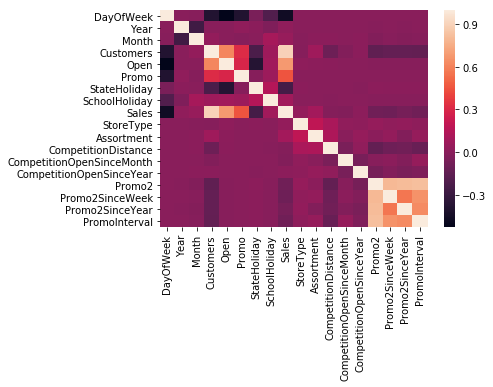

In [54]:
sns.heatmap(data=coriMat)
plt.show()

In [55]:
#Merge test and store datasets
test_store = datatest.reset_index().merge(store, how = 'left', on='Store')

In [56]:
test_store.shape

(41088, 19)

In [57]:
test_store = test_store[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Open','Promo', 'StateHoliday', 'SchoolHoliday','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']]
list(test_store.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [58]:
test_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Year                         0
Month                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## Modeling

In [59]:
train_model = train_store.drop(['Customers', 'Date'], axis=1)
train_model_cust = train_store.drop(['Sales', 'Date'], axis=1)
#print(train_model.head())

In [60]:
test_model = test_store.drop(['Date'], axis=1)
test_model_cust = test_store.drop(['Date'], axis=1)
#print(test_model.head())

In [61]:
train_model_cust.shape

(1017209, 18)

In [62]:
test_model_cust.shape

(41088, 17)

In [63]:
SalesDF = train_model['Sales']
train_model = train_model.drop(['Sales'], axis=1)
train_model['Sales'] = SalesDF

SalesDF = train_model_cust['Customers']
train_model_cust = train_model_cust.drop(['Customers'], axis=1)
train_model_cust['Customers'] = SalesDF

In [64]:
train_model_cust.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Customers
0,1,5,2015,7,1,1,0,1,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,555
1,2,5,2015,7,1,1,0,1,1.0,0.0,570.0,11.0,2007.0,1.0,37.0,5.0,1.0,625
2,3,5,2015,7,1,1,0,1,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0,821
3,4,5,2015,7,1,1,0,1,0.0,1.0,620.0,9.0,2009.0,0.0,0.0,0.0,0.0,1498
4,5,5,2015,7,1,1,0,1,1.0,0.0,29910.0,4.0,2015.0,0.0,0.0,0.0,0.0,559


In [65]:
test_model_copy = test_model

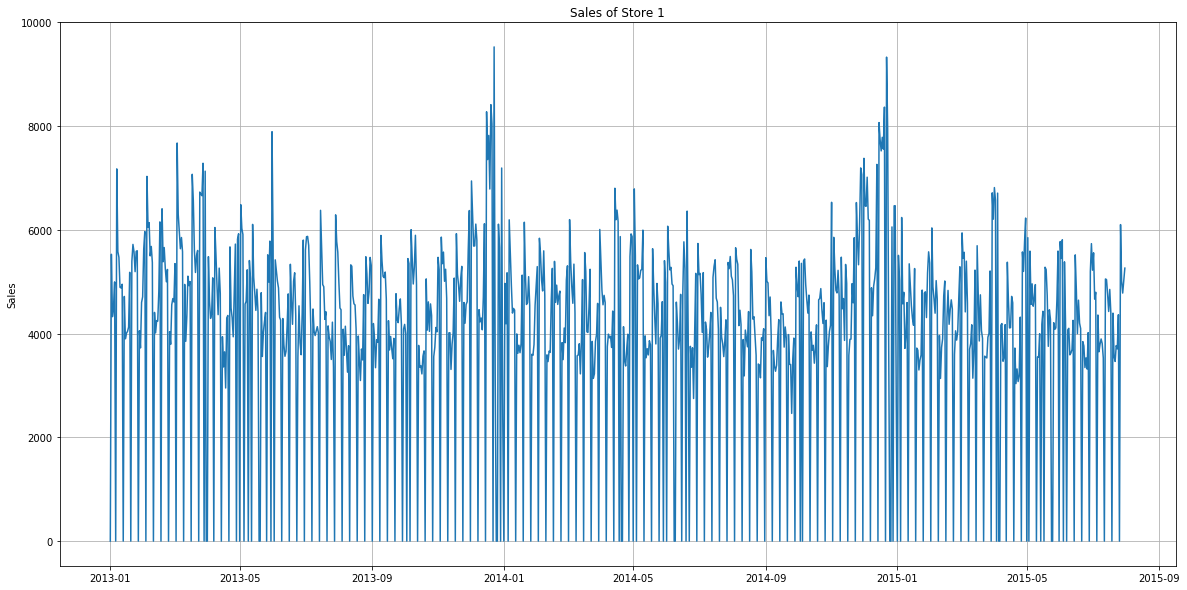

In [66]:
store_1 = train_model[train_model['Store'] == 1]
tstore_1 = train_store[train_store['Store'] == 1]
plt.figure(figsize=(20,10))
plt.plot(tstore_1['Date'], store_1['Sales'])
plt.title("Sales of Store 1")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## Feature selection

In [67]:
train_feature = train_model
test_feature = test_model

In [68]:
train_feature = train_feature.drop(['Year','Month','StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval'], axis=1)

In [69]:
train_feature.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Sales
0,1,5,1,1,0,1,1270.0,5263
1,2,5,1,1,0,1,570.0,6064
2,3,5,1,1,0,1,14130.0,8314
3,4,5,1,1,0,1,620.0,13995
4,5,5,1,1,0,1,29910.0,4822


In [70]:
test_feature = test_feature.drop(['Year','Month','StoreType','Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval'], axis=1)

In [71]:
test_feature.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance
0,1,4,1.0,1,0,0,1270.0
1,3,4,1.0,1,0,0,14130.0
2,7,4,1.0,1,0,0,24000.0
3,8,4,1.0,1,0,0,7520.0
4,9,4,1.0,1,0,0,2030.0


In [72]:
from sklearn.cross_validation import train_test_split
Xf = train_feature.drop('Sales', axis=1)
yf = train_feature['Sales']
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, random_state=42)

C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

In [74]:
lr = LinearRegression()
lr.fit(Xf_train, yf_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
from sklearn.model_selection import cross_val_score
#print(lr.score(X_test, y_test))
#print(" train set accuracy: {:.2f}".format(lr.score(X_train, y_train)))
print(" test set accuracy: {:.2f}".format(lr.score(Xf_test, yf_test)))

scores = cross_val_score(lr, Xf_test, yf_test, cv=5)
scores

 test set accuracy: 0.54


array([0.53679674, 0.53540661, 0.53746898, 0.53172823, 0.53566987])

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(Xf_train, yf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [77]:
print(" test set accuracy: {:.2f}".format(rf.score(Xf_test, yf_test)))
scores = cross_val_score(rf, Xf_test, yf_test, cv=5)
scores

 test set accuracy: 0.91


array([0.90185776, 0.89795661, 0.90240245, 0.8992019 , 0.90218422])

## Without feature selection

In [78]:
from sklearn.cross_validation import train_test_split
X = train_model.drop('Sales', axis=1)
y = train_model['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
from sklearn.model_selection import cross_val_score
print(" test set accuracy for sales: {:.2f}".format(lr.score(X_test, y_test)))

scores = cross_val_score(lr, X_test, y_test, cv=5)
scores

 test set accuracy for sales: 0.56


array([0.56025766, 0.55880188, 0.55987175, 0.55491396, 0.55873551])

In [81]:
y_pred = lr.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))

Mean squared error: 6534284.06
Mean absolute error: 1771.71
Root mean squared error: 2556.22


In [83]:
test_model.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015,9,1.0,1,0,0,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0
1,3,4,2015,9,1.0,1,0,0,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0
2,7,4,2015,9,1.0,1,0,0,1.0,1.0,24000.0,4.0,2013.0,0.0,0.0,0.0,0.0
3,8,4,2015,9,1.0,1,0,0,1.0,0.0,7520.0,10.0,2014.0,0.0,0.0,0.0,0.0
4,9,4,2015,9,1.0,1,0,0,1.0,1.0,2030.0,8.0,2000.0,0.0,0.0,0.0,0.0


In [84]:
test_model.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015,9,1.0,1,0,0,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0
1,3,4,2015,9,1.0,1,0,0,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0
2,7,4,2015,9,1.0,1,0,0,1.0,1.0,24000.0,4.0,2013.0,0.0,0.0,0.0,0.0
3,8,4,2015,9,1.0,1,0,0,1.0,0.0,7520.0,10.0,2014.0,0.0,0.0,0.0,0.0
4,9,4,2015,9,1.0,1,0,0,1.0,1.0,2030.0,8.0,2000.0,0.0,0.0,0.0,0.0


In [85]:
test_model_copy['Predict_linear'] = lr.predict(test_model)

In [86]:
test_model.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Predict_linear
0,1,4,2015,9,1.0,1,0,0,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,8355.423580
1,3,4,2015,9,1.0,1,0,0,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0,7334.290024
2,7,4,2015,9,1.0,1,0,0,1.0,1.0,24000.0,4.0,2013.0,0.0,0.0,0.0,0.0,8738.154586
3,8,4,2015,9,1.0,1,0,0,1.0,0.0,7520.0,10.0,2014.0,0.0,0.0,0.0,0.0,8288.129953
4,9,4,2015,9,1.0,1,0,0,1.0,1.0,2030.0,8.0,2000.0,0.0,0.0,0.0,0.0,9143.529673


In [87]:
#test_model = test_model.drop('Predict_linear', axis=1)

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [89]:
print(" test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))
scores = cross_val_score(rf, X_test, y_test, cv=5)
scores


 test set accuracy: 0.93


array([0.91835825, 0.91568859, 0.91892682, 0.91811208, 0.92078823])

In [90]:
y_pred_RF = rf.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_RF))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred_RF))
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_RF)))

Mean squared error: 1050601.97
Mean absolute error: 616.93
Root mean squared error: 1024.99


In [93]:
test_model = test_model.drop('Predict_linear', axis=1)
test_model_copy['Predict_RandomForest'] = rf.predict(test_model)

In [94]:
test_model_copy.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Predict_linear,Predict_RandomForest
0,1,4,2015,9,1.0,1,0,0,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,8355.423580,4478.600000
1,3,4,2015,9,1.0,1,0,0,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0,7334.290024,7719.575000
2,7,4,2015,9,1.0,1,0,0,1.0,1.0,24000.0,4.0,2013.0,0.0,0.0,0.0,0.0,8738.154586,9710.500000
3,8,4,2015,9,1.0,1,0,0,1.0,0.0,7520.0,10.0,2014.0,0.0,0.0,0.0,0.0,8288.129953,8382.000000
4,9,4,2015,9,1.0,1,0,0,1.0,1.0,2030.0,8.0,2000.0,0.0,0.0,0.0,0.0,9143.529673,8217.416667


In [95]:
test_model_copy['Date'] = test_store['Date']
train_model['Date'] = train_store['Date']

In [96]:
storetrain_1 = train_model[train_model['Store'] == 1]
storetest_1 = test_model_copy[test_model_copy['Store'] == 1]
#storetest_1.head()

In [97]:
storetrain_15 = train_model[train_model['Store'] == 15]
storetest_15 = test_model_copy[test_model_copy['Store'] == 15]
#storetest_1.head()

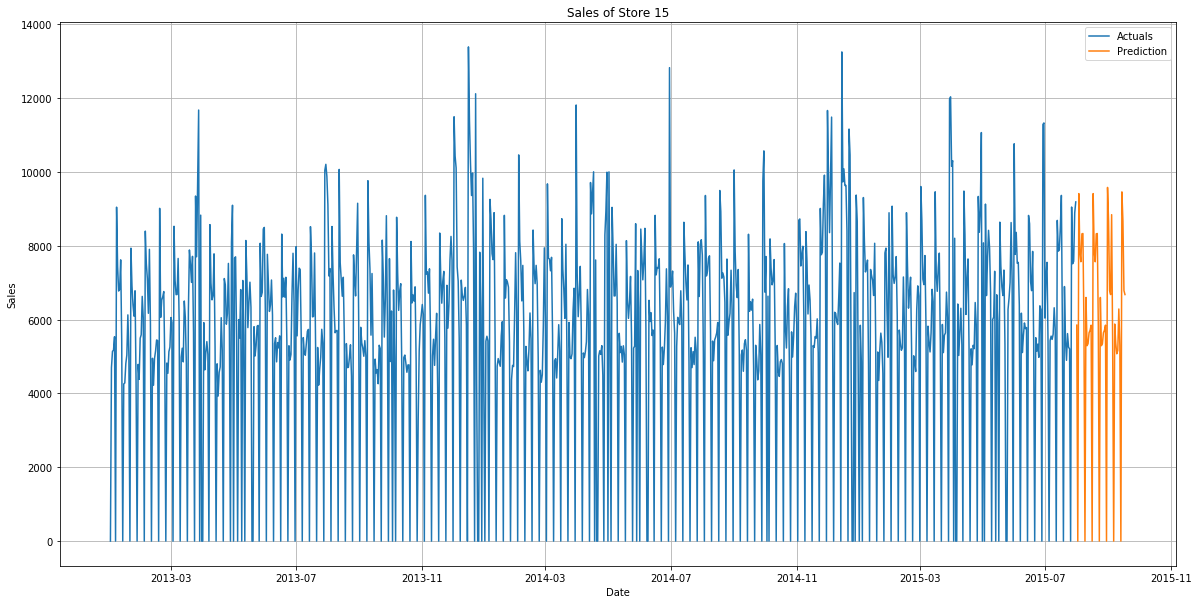

In [98]:
plt.figure(figsize=(20,10))
plt.plot(storetrain_15['Date'], storetrain_15['Sales'],label="Actuals")
plt.plot(storetest_15['Date'], storetest_15['Predict_RandomForest'],label="Prediction")
plt.title("Sales of Store 15")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

In [99]:
storetrain_1 = train_model[train_model['Store'] == 1]
X_store_1 = storetrain_1 [storetrain_1['Year'] == 2015]
storetest_1 = test_model_copy[test_model_copy['Store'] == 1]


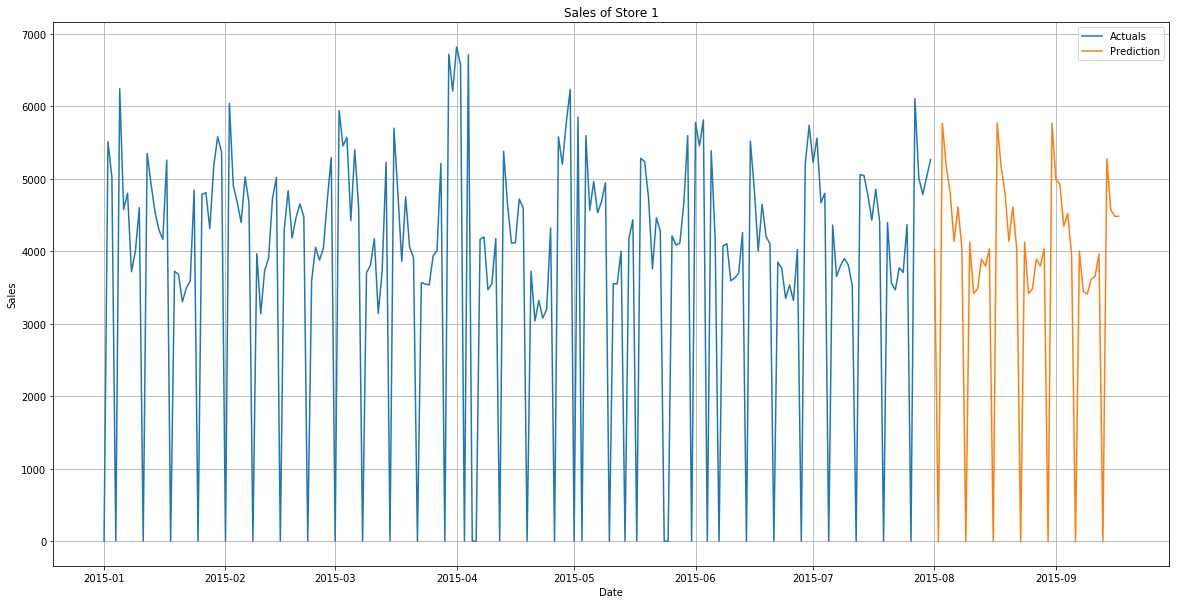

In [100]:
plt.figure(figsize=(20,10))
plt.plot(X_store_1['Date'], X_store_1['Sales'],label="Actuals")
plt.plot(storetest_1['Date'], storetest_1['Predict_RandomForest'],label="Prediction")
plt.title("Sales of Store 1")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

In [101]:
storetrain_1_copy = storetrain_1
X_storetrain_1 = storetrain_1.drop(['Sales','Date'], axis=1).values
store1_pred_RF = rf.predict(X_storetrain_1)

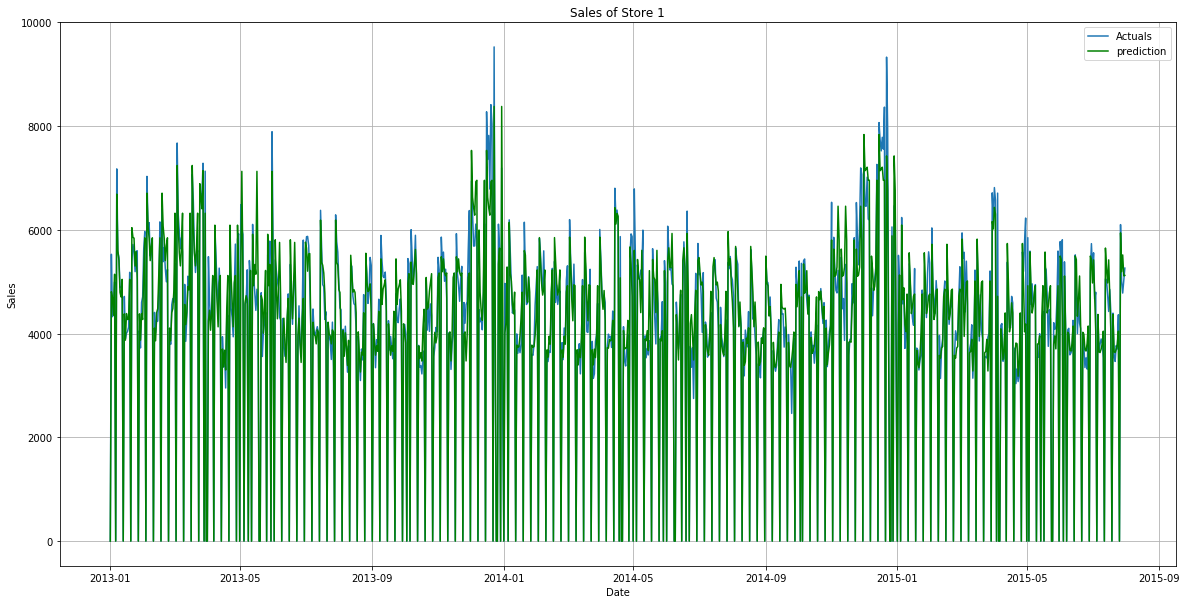

In [102]:
plt.figure(figsize=(20,10))
plt.plot(storetrain_1['Date'], storetrain_1['Sales'],label="Actuals")
plt.plot(storetrain_1['Date'], store1_pred_RF,c='g', label="prediction")
plt.title("Sales of Store 1")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

In [103]:
storetrain_1_copy['Predict_RandomForest'] = store1_pred_RF

C:\Users\abhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
storeX_1 = storetrain_1_copy [storetrain_1_copy['Year'] == 2015]

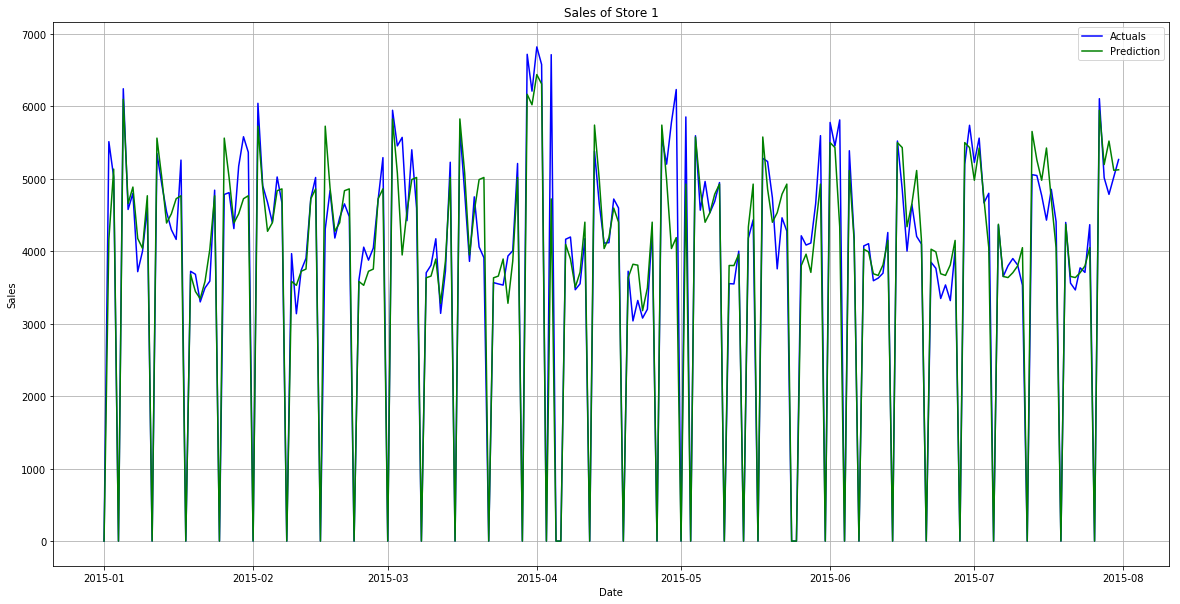

In [105]:
plt.figure(figsize=(20,10))
plt.plot(storeX_1['Date'], storeX_1['Sales'],c='b', label="Actuals")
plt.plot(storeX_1['Date'], storeX_1['Predict_RandomForest'],c='g', label="Prediction")
#plt.plot(storetest_1['Date'], storetest_1['Predict_RandomForest'],c='r', label="prediction")
plt.title("Sales of Store 1")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

In [106]:
storetrain_15 = train_model[train_model['Store'] == 15]
storetest_15 = test_model_copy[test_model_copy['Store'] == 15]
#storetest_15.head()

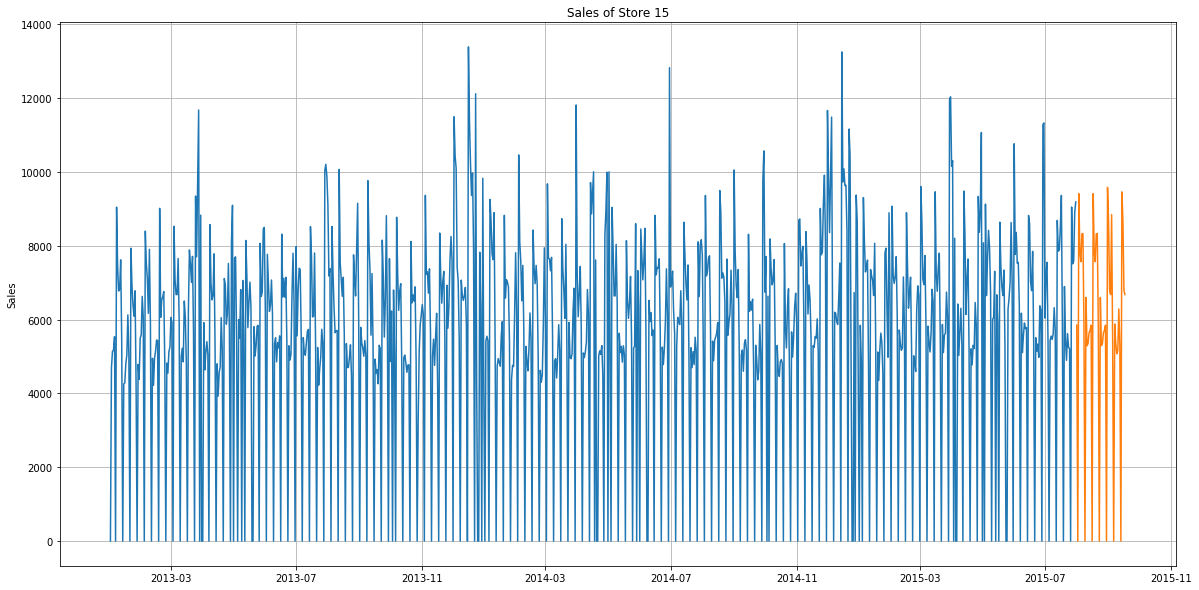

In [107]:
plt.figure(figsize=(20,10))
plt.plot(storetrain_15['Date'], storetrain_15['Sales'])
plt.plot(storetest_15['Date'], storetest_15['Predict_RandomForest'])
plt.title("Sales of Store 15")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [108]:
storetrain_156 = train_model[train_model['Store'] == 156]
storetest_156 = test_model_copy[test_model_copy['Store'] == 156]
#storetest_15.head()

In [109]:
storetrain_236 = train_model[train_model['Store'] == 236]
storetest_236 = test_model_copy[test_model_copy['Store'] == 236]

In [110]:
storetrain_516 = train_model[train_model['Store'] == 516]
storetest_516 = test_model_copy[test_model_copy['Store'] == 516]

In [111]:
storetrain_1003 = train_model[train_model['Store'] == 1003]
storetest_1003 = test_model_copy[test_model_copy['Store'] == 1003]
#storetest_3.head()

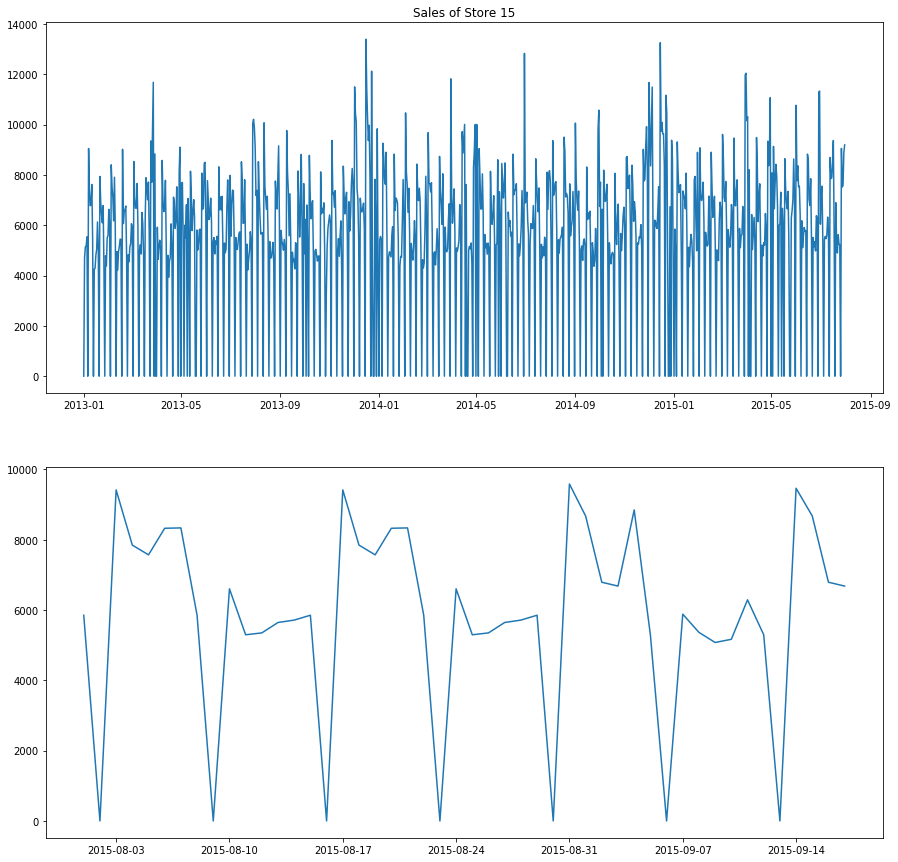

In [112]:
#plt.figure(figsize=(50,50))
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))
ax1.set_title("Sales of Store 15")
ax1.plot(storetrain_15['Date'], storetrain_15['Sales'])
ax2.plot(storetest_15['Date'], storetest_15['Predict_RandomForest'])

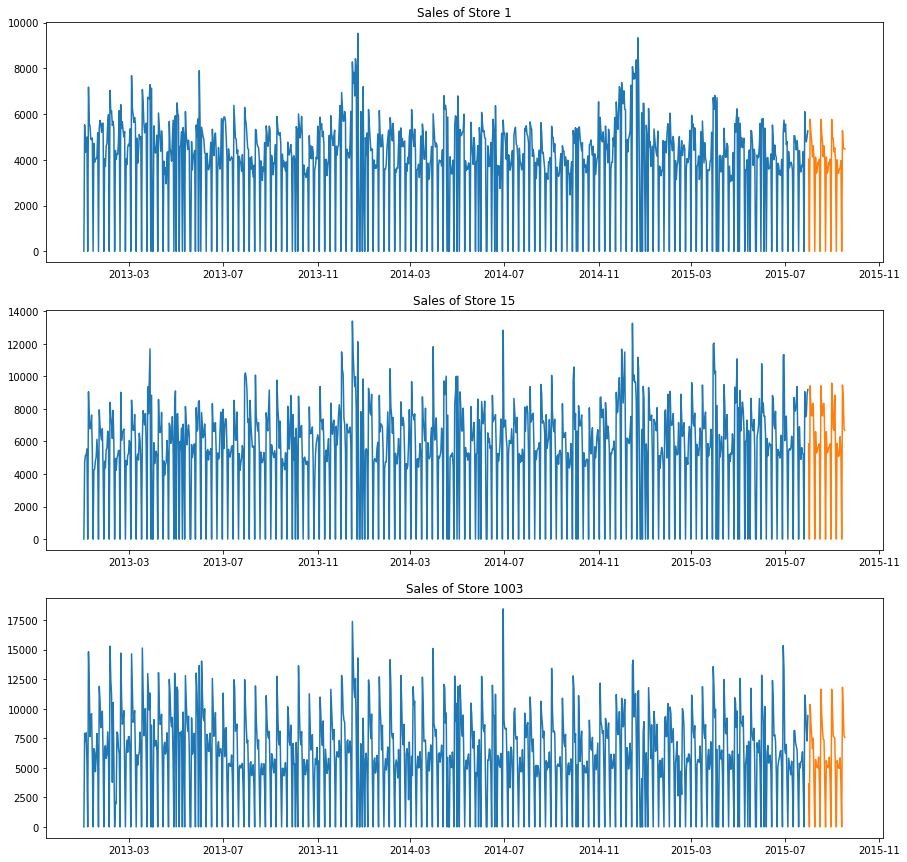

In [113]:

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,15))
ax1.set_title("Sales of Store 1")
ax1.plot(storetrain_1['Date'], storetrain_1['Sales'])
ax1.plot(storetest_1['Date'], storetest_1['Predict_RandomForest'])

ax2.set_title("Sales of Store 15")
ax2.plot(storetrain_15['Date'], storetrain_15['Sales'])
ax2.plot(storetest_15['Date'], storetest_15['Predict_RandomForest'])


ax3.set_title("Sales of Store 1003")
ax3.plot(storetrain_1003['Date'], storetrain_1003['Sales'])
ax3.plot(storetest_1003['Date'], storetest_1003['Predict_RandomForest'])



## Customer prediction 

In [114]:
Xc = train_model_cust.drop('Customers', axis=1)
yc = train_model_cust['Customers']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, random_state=42)

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(Xc_train, yc_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [116]:
print(" test set accuracy: {:.2f}".format(rf.score(Xc_test, yc_test)))
scores_Customers = cross_val_score(rf, Xc_test, yc_test, cv=5)
scores_Customers

 test set accuracy: 0.96


array([0.95524214, 0.95377177, 0.95535059, 0.95664713, 0.95705829])

In [117]:
y_pred_Customers = rf.predict(Xc_test)

In [118]:

test_model_cust['Customers'] = rf.predict(test_model_cust)

In [119]:
test_model_cust['Date'] = test_store['Date'] 
train_model_cust['Date'] = train_store['Date'] 

In [120]:
test_model_cust.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Customers,Date
0,1,4,2015,9,1.0,1,0,0,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,523.600000,2015-09-17
1,3,4,2015,9,1.0,1,0,0,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0,802.183333,2015-09-17
2,7,4,2015,9,1.0,1,0,0,1.0,1.0,24000.0,4.0,2013.0,0.0,0.0,0.0,0.0,1002.633333,2015-09-17
3,8,4,2015,9,1.0,1,0,0,1.0,0.0,7520.0,10.0,2014.0,0.0,0.0,0.0,0.0,943.600000,2015-09-17
4,9,4,2015,9,1.0,1,0,0,1.0,1.0,2030.0,8.0,2000.0,0.0,0.0,0.0,0.0,657.450000,2015-09-17


In [121]:
storetrain_cust_15 = train_model_cust[train_model_cust['Store'] == 15]
storetest_cust_15 = test_model_cust[test_model_cust['Store'] == 15]

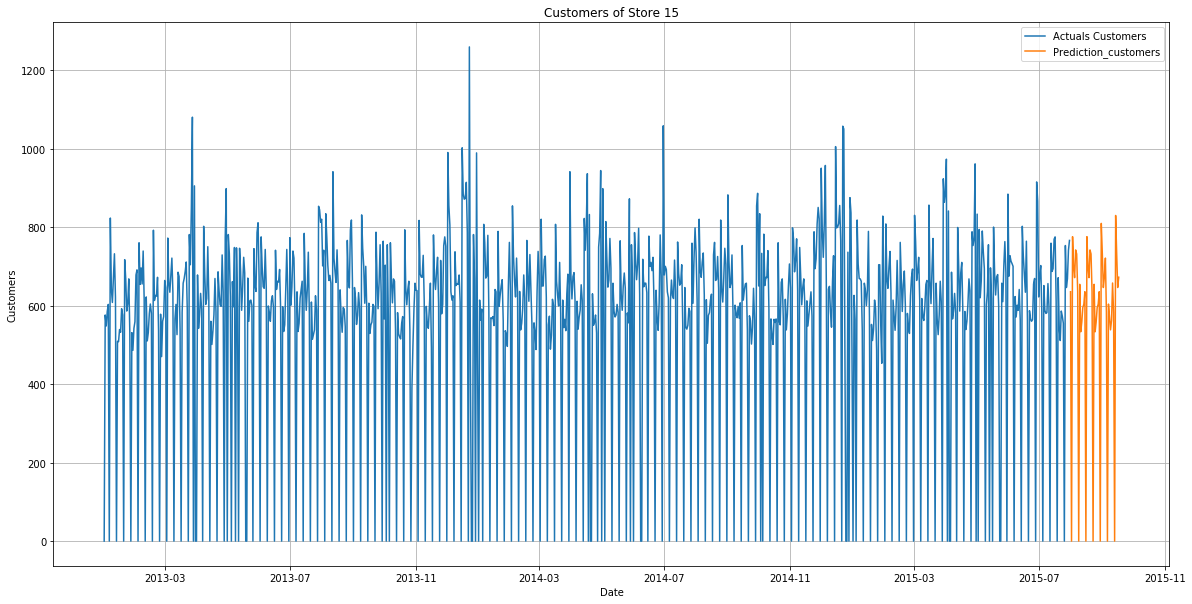

In [122]:
plt.figure(figsize=(20,10))
plt.plot(storetrain_cust_15['Date'], storetrain_cust_15['Customers'],label="Actuals Customers")
plt.plot(storetest_cust_15['Date'], storetest_cust_15['Customers'],label="Prediction_customers")
plt.title("Customers of Store 15")
plt.ylabel("Customers")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

### Checking whether sales are higher when promos are running

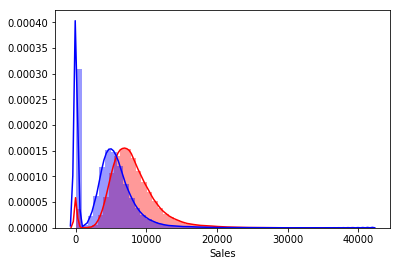

In [123]:
sns.distplot( train_model[train_model.Promo == 1].Sales, color = 'r' )
sns.distplot( train_model[train_model.Promo == 0].Sales, color = 'b' )

In [124]:
plt.show()

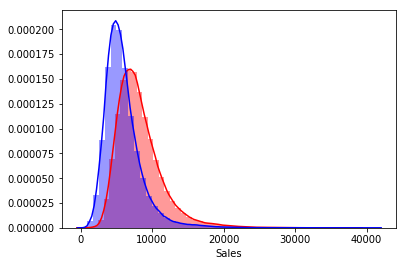

In [125]:
#Remove entries with zero sales and checking  sales higher when promos running
train_model_copy = train_model[ train_model.Sales > 0 ]
sns.distplot( train_model_copy[train_model_copy.Promo == 1].Sales, color = 'r' )
sns.distplot( train_model_copy[train_model_copy.Promo == 0].Sales, color = 'b' )
plt.show()

In [126]:
#Average Sales for promo and non-promo days
avg_sales_non_promo = train_model_copy[train_model_copy.Promo == 0].Sales.mean()
avg_sales_promo = train_model_copy[train_model_copy.Promo == 1].Sales.mean()

In [127]:
print( "Average sales during promo days:", round( avg_sales_promo, 2 ) )
print( "Average sales during non promo days:", round( avg_sales_non_promo, 2 ) )

Average sales during promo days: 8228.74
Average sales during non promo days: 5929.83


### Compare the sales distribution for different store type and analyze promo effect

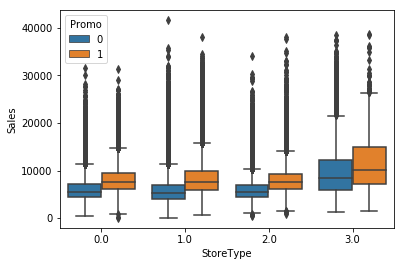

In [128]:
sns.boxplot( x = 'StoreType', y = 'Sales', hue = 'Promo', data = train_model_copy  )

In [129]:
plt.show()

### Checking whether or not  sales higher when there is a holiday next day?


In [130]:
train_model_copy ['next_day_school_holiday'] = train_model_copy .groupby(['Store'])['SchoolHoliday'].shift( -1 )

C:\Users\abhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
next_day_holiday = train_model_copy[(train_model_copy.next_day_school_holiday == 1) &
                                 (train_model_copy.SchoolHoliday == 0)]
next_day_no_holiday = train_model_copy[(train_model_copy.next_day_school_holiday == 0) &
                                 (train_model_copy.SchoolHoliday == 0)]

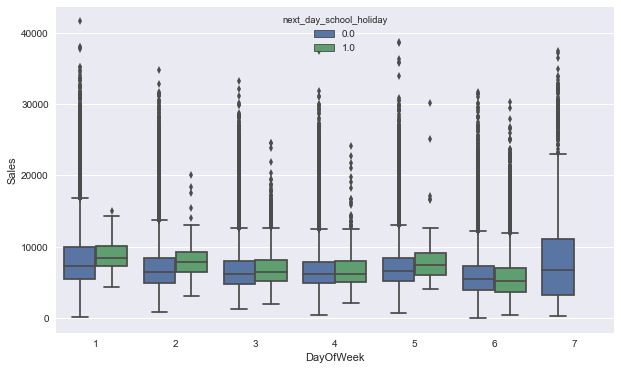

In [132]:
sns.set(rc={"figure.figsize": (10, 6)});

sns.boxplot( x = 'DayOfWeek',y = 'Sales',hue = 'next_day_school_holiday',data = pd.concat( [next_day_holiday, next_day_no_holiday] ) )

In [133]:
plt.show()
#Surprisingly the sales are lower if the next day is a holiday